In [ ]:
%pip install mne
%pip install pymatreader
%pip install numpy
%pip install --upgrade mne

In [142]:
import numpy as np
import mne

# Load the .npy file
npy_file_path = r'raw_data\110\0e1501f6-895c-476c-a979-9dcc32daae92.npy'
eeg_data = np.load(npy_file_path)
eeg_data = eeg_data.T
eeg_data = eeg_data[:8]

# Select only the EEG channels

# choose only second and fourth channel
# eeg_data = eeg_data[:, [1, 3]].T

# Define the info structure for MNE
sfreq = 250  # Assuming a sampling frequency of 256 Hz, adjust accordingly
ch_names = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
ch_types = ['eeg'] * len(ch_names)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create Raw object
raw = mne.io.RawArray(eeg_data, info)

# Save as .fif file
fif_file_path = 'brain-fif/110/110.fif'
raw.save(fif_file_path, overwrite=True)

fif_file_path


Creating RawArray with float64 data, n_channels=8, n_times=1750
    Range : 0 ... 1749 =      0.000 ...     6.996 secs
Ready.
Overwriting existing file.
Writing d:\Hack4 BCI\brain-fif\110\110.fif
Closing d:\Hack4 BCI\brain-fif\110\110.fif
[done]


C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1395278062.py:26: RuntimeWarning: This filename (d:\Hack4 BCI\brain-fif\110\110.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file_path, overwrite=True)


'brain-fif/110/110.fif'

In [143]:
# collect .ftf to variable
temp = mne.io.read_raw_fif('brain-fif/110/110.fif', preload=True)

Opening raw data file brain-fif/110/110.fif...
Isotrak not found
    Range : 0 ... 1749 =      0.000 ...     6.996 secs
Ready.
Reading 0 ... 1749  =      0.000 ...     6.996 secs...


C:\Users\msi\AppData\Local\Temp\ipykernel_14364\541607309.py:2: RuntimeWarning: This filename (brain-fif/110/110.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp = mne.io.read_raw_fif('brain-fif/110/110.fif', preload=True)


In [144]:
temp.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


Setting up band-pass filter from 7 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 40.00 Hz: -6.02, -6.02 dB



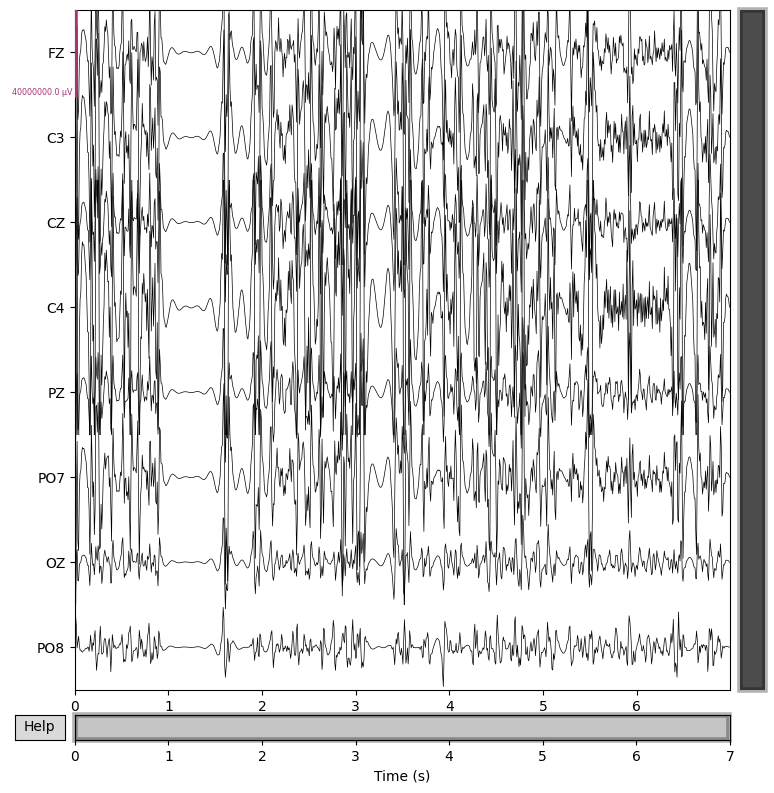

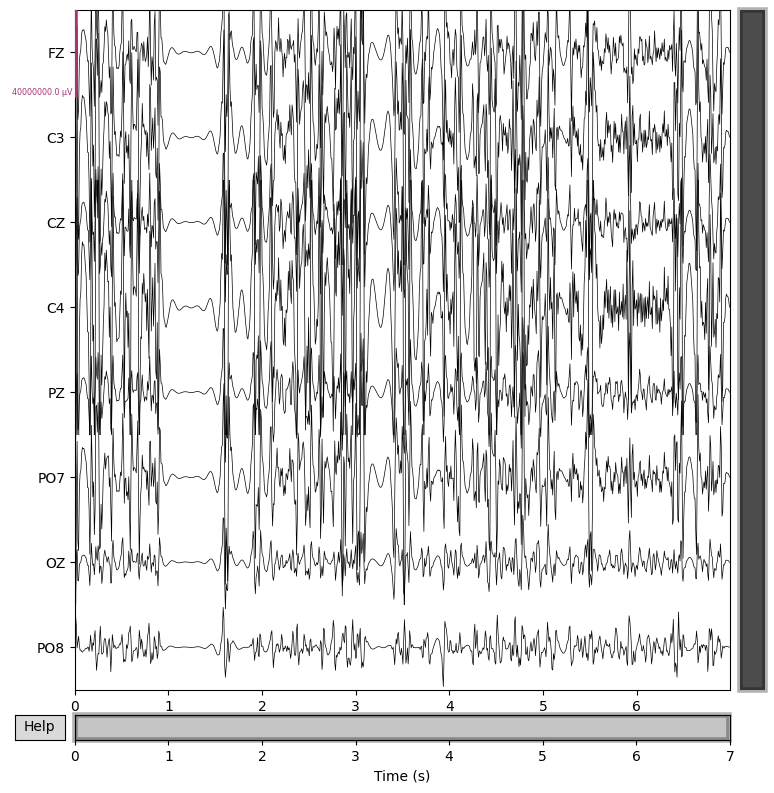

In [145]:
temp.plot(scalings=dict(eeg=20), lowpass=40, highpass=7)

=============Bandpass filter data 7 Hz - 40 Hz=============

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (6.602 s)

Bandpass filter finish
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\4059859670.py:8: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_fil.plot_psd()
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\4059859670.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_fil.plot_psd()
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_in

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,40.00 Hz


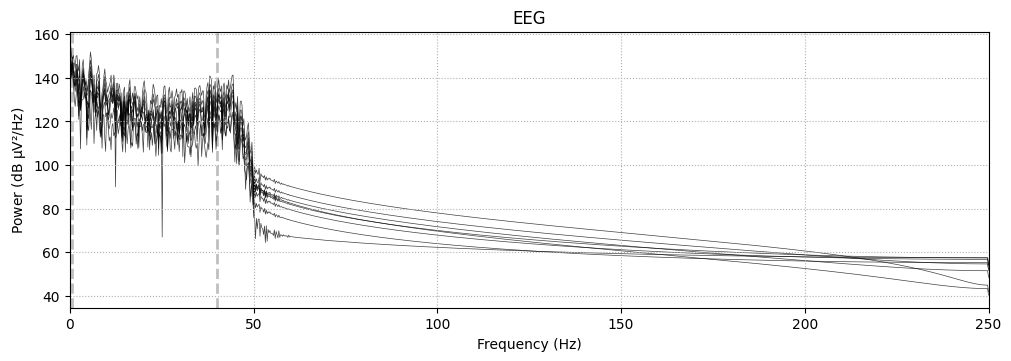

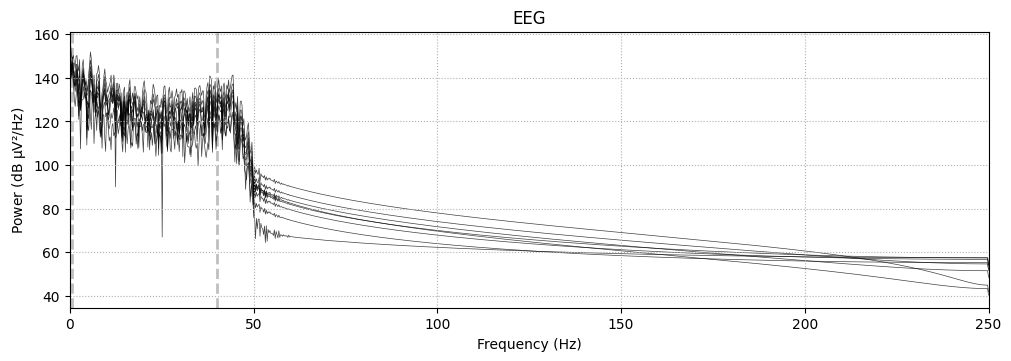

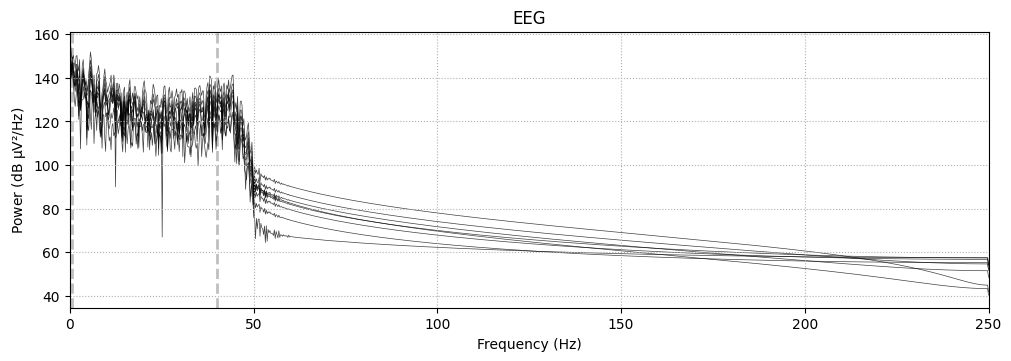

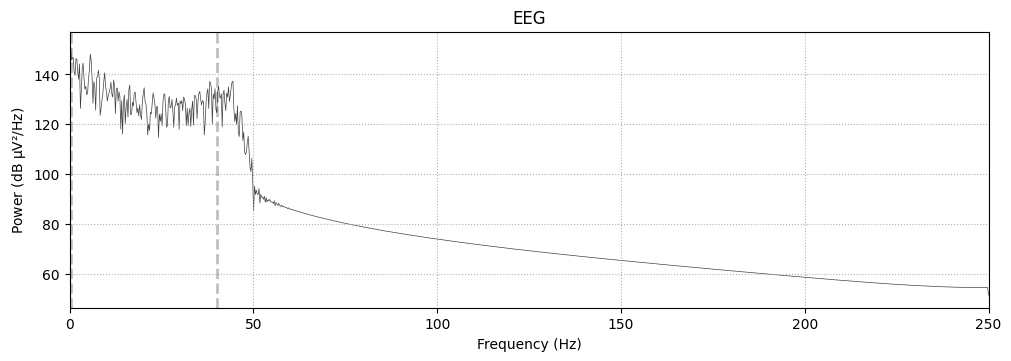

In [148]:
#Bandpass filter 
low_cut = 0.5
high_cut = 40

print("=============Bandpass filter data 7 Hz - 40 Hz=============\n")
raw_fil = temp.filter(low_cut,high_cut,fir_design='firwin')
print("Bandpass filter finish")
raw_fil.plot_psd()

#remove power line
raw_fil.plot_psd(area_mode='range')
temp_fil_notch = raw_fil.notch_filter(None, filter_length='auto',phase='zero',method='spectrum_fit')
temp_fil_notch.plot_psd(area_mode='range')

# Resampling
temp_fil_notch_resam = temp_fil_notch.resample(500, npad="auto")  # set sampling frequency to 100Hz
temp_fil_notch_resam.plot_psd(area_mode='range',picks='C3')
temp_fil_notch_resam.info

In [147]:
from scipy import signal

In [164]:
# function convert
frequency_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

def find_dominant_freq(data_path,label):

  file_path = data_path
  raw = mne.io.read_raw_eeglab(file_path, preload=True)

  #Bandpass filter 0.1Hz-100Hz
  low_cut = 0.5
  high_cut = 40

  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
  raw_fil = raw
  #romove power line
  #raw_fil_notch = raw_fil.notch_filter(np.arange(60, 241, 60), filter_length='auto',phase='zero')

  # Resampling

  raw_fil_notch_resam = raw_fil.resample(250, npad="auto")  # set sampling frequency to 100Hz

  # raw_fil_notch_resam.plot_psd(area_mode='range', tmax=10.0,picks='FP1')
  # raw_fil_notch_resam.info

  eeg_data = raw_fil_notch_resam

  # Empty dictionary to store the dominant frequencies
  dominant_frequencies = {}
  sampling_rate = eeg_data.info['sfreq']
  nperseg = 2048

  for channel in eeg_data.ch_names:
      eeg_signal = eeg_data[channel][0]
      frequencies, psd = signal.welch(eeg_signal, sampling_rate,nperseg=nperseg)

      # print(len(eeg_signal[0]))
      # print(len(psd[0]))
      # print(frequencies[:-10])
      # dominant_frequencies['id'] = id
      dominant_frequencies['label'] = label
      for band, freq_range in frequency_bands.items():

          freq_indices = np.where(np.logical_and(frequencies >= freq_range[0], frequencies <= freq_range[1]))[0]
          dominant_frequency = frequencies[freq_indices[np.argmax(psd[0][freq_indices])]]

          name = channel + "_" + band
          dominant_frequencies[name] = dominant_frequency
          # print(name,'=',dominant_frequency)

  # final = pd.DataFrame([dominant_frequencies])
  return dominant_frequencies

# final.columns()

### P'Inw

In [ ]:
import os
import mne
import numpy as np

# Define your data folder path
data_folder = r"EEG_SKY\inw250"

# Iterate through each file in the folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('.set'):  # Assuming your files have a .set extension
        file_path = os.path.join(data_folder, file_name)
        
        # Read raw EEG data
        raw = mne.io.read_raw_eeglab(file_path, preload=True)
        
        # Resample the data
        raw_resampled = raw.resample(250, npad="auto")
        
        # Convert to numpy array
        data = raw_resampled.get_data()
        
        # Define the output file name for the resampled data
        output_file_name = os.path.splitext(file_name)[0] + '_resampled.npy'
        output_file_path = os.path.join(data_folder, output_file_name)
        
        # Save the resampled data as .npy file
        np.save(output_file_path, data)
        
        print(f"Resampled data saved to {output_file_path}")


In [ ]:
import os

def remove_files_with_extension(folder_path, extension):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Iterate through the files
    for file_name in files:
        # Check if the file ends with the specified extension
        if file_name.endswith(extension):
            # Form the full file path
            file_path = os.path.join(folder_path, file_name)
            try:
                # Attempt to remove the file
                os.remove(file_path)
                print(f"Removed: {file_path}")
            except OSError as e:
                print(f"Error while deleting {file_path}: {e}")

# Specify the folder path
folder_path = 'EEG_SKY\inw250'
# Specify the extension you want to remove
extension = '.set'

# Call the function to remove files with the specified extension
remove_files_with_extension(folder_path, extension)


In [ ]:
%pip install eeglabio

In [ ]:
import numpy as np
import mne

# Load the .npy file
data = np.load(r'split_merge_class\110\0_1_110.npy')

# Transpose the data if necessary (MNE expects shape as (n_channels, n_times))

# Define metadata
sfreq = 256  # Example sampling frequency, adjust as necessary
ch_names = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
ch_types = ['eeg'] * 8

# Create MNE Info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create RawArray
raw = mne.io.RawArray(data, info)

# Save as .set file
output_path = 'path_to_your_output_file.set'
mne.export.export_raw(output_path, raw, fmt='eeglab')
print("EEG data has been saved to .set file successfully.")


### Convert to .set

In [149]:
import os
import numpy as np
import mne

def convert_npy_to_set(npy_folder, output_folder, sfreq=250, ch_names=None, ch_types=None):
    if ch_names is None:
        ch_names = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
    if ch_types is None:
        ch_types = ['eeg'] * len(ch_names)
    
    # Create MNE Info object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    
    # Make sure output directory exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate through all .npy files in the specified folder
    for filename in os.listdir(npy_folder):
        if filename.endswith('.npy'):
            # Load the .npy file
            data_path = os.path.join(npy_folder, filename)
            data = np.load(data_path)
            data = data.T
            data = data[:8][:, 500:1251]
            # Check if data needs to be transposed
            if data.shape[0] != len(ch_names):
                data = data.T
            
            # Create RawArray
            raw = mne.io.RawArray(data, info)
            
            # Define output .set file path
            output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.set')
            
            # Save as .set file
            mne.export.export_raw(output_path, raw, fmt='eeglab', overwrite=True)
            print(f"EEG data from {filename} has been saved to {output_path} successfully.")

# Example usage
#npy_folder = r'split_merge_class_eeg\150'              #110 120 150
npy_folder = r'raw_data\150'
output_folder = r'EEG_SKY\new\150'                         #110 120 150
convert_npy_to_set(npy_folder, output_folder)


Creating RawArray with float64 data, n_channels=8, n_times=751
    Range : 0 ... 750 =      0.000 ...     3.000 secs
Ready.
Overwriting existing file.
EEG data from 05173902-1c16-460d-8a3c-69ef760a8633.npy has been saved to EEG_SKY\new\150\05173902-1c16-460d-8a3c-69ef760a8633.set successfully.
Creating RawArray with float64 data, n_channels=8, n_times=751
    Range : 0 ... 750 =      0.000 ...     3.000 secs
Ready.
Overwriting existing file.
EEG data from 060a0311-6873-4205-960c-d9d566725c44.npy has been saved to EEG_SKY\new\150\060a0311-6873-4205-960c-d9d566725c44.set successfully.
Creating RawArray with float64 data, n_channels=8, n_times=751
    Range : 0 ... 750 =      0.000 ...     3.000 secs
Ready.
Overwriting existing file.
EEG data from 0b32f114-f92a-4b9d-aa81-66b027f9bb52.npy has been saved to EEG_SKY\new\150\0b32f114-f92a-4b9d-aa81-66b027f9bb52.set successfully.
Creating RawArray with float64 data, n_channels=8, n_times=751
    Range : 0 ... 750 =      0.000 ...     3.000 sec

### .set to csv

In [165]:
import pandas as pd
import os
from scipy import signal
import mne
import numpy as np

In [166]:
# conver data_path_merge
sum_train_list = []
error_count = 0

for eeg_dir in os.listdir(r'EEG_SKY\new\110'):
    try:
        print(fr'EEG_SKY\new\110{eeg_dir}')
        dominant_frequencies_final = find_dominant_freq(fr'EEG_SKY\new\110\{eeg_dir}', '110')
        sum_train_list.append(dominant_frequencies_final)
    except:
        error_count += 1

EEG_SKY\new\110017b8814-e90f-40c0-9e20-f492e66e8ed0.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110050a11a6-5000-41b3-ad17-2dbe4d93e877.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\1102919234b-8f4b-4eb0-88c7-5da91d3129b0.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\11046966c58-b8fc-4b90-8c86-1b8b3e8cc006.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\11053337197-b946-4f7d-a1e1-4c834b50ab58.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edg

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\11066b020b8-5a2d-476f-af66-c07e9b7986de.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper p

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\11098db489c-1d50-4808-a471-6cef23106bb7.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition ba

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110a4d71795-8a56-4357-926a-c87dd09954e9.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110cf431414-e833-4b7e-a8de-e8dd2e57a6dc.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edg

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110e7cd083f-5039-4fc9-8d83-45ed1a39ba44.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110e9afb3f9-1bce-4165-8c95-7d0cc0b3394f.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) meth

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]:

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110fba49cda-49b5-4b88-a096-edd6373e3639.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\110fce342b3-87af-48f7-b159-cfc68ddbe5c5.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) meth

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\2514569745.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]:

In [167]:
len(sum_train_list)

0

In [168]:
print(error_count)

60


In [154]:
# conver data_path_merge
error_count = 0

for eeg_dir in os.listdir(r'EEG_SKY\new\120'):
    try:
        print(fr'EEG_SKY\new\120\{eeg_dir}')
        dominant_frequencies_final = find_dominant_freq(fr'EEG_SKY\new\120\{eeg_dir}', '120')
        sum_train_list.append(dominant_frequencies_final)
    except:
        error_count += 1

EEG_SKY\new\120\03112dd6-0a3c-407d-b7bd-4d0e8b81d7b5.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\046c91d5-38ee-4ef0-b9aa-bd92f09d51c3.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband 

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

EEG_SKY\new\120\200d55eb-45f1-4b04-b827-bacf389ef239.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\22137490-214d-41fc-aee9-fef9e5800322.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband 

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\3212897b-3bf4-4909-9978-9eb6ca30f6f6.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband ed

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\4a26124f-436d-4c7d-9a82-f1c2f6b7784b.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\4c71fa8f-02fc-4644-bcdf-ef4b2a37a908.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) me

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\658f2930-d487-472c-8471-d87584ea68e8.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\659bae65-8462-4725-8cff-463c7624da96.set
Filtering raw dat

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\7cc53d14-d331-4e51-890e-21d6517cc951.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband ed

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\8dc46187-9db2-4915-822e-70efb59c0d41.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband ed

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw


Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\cf302e28-b4a5-4c46-8af4-9056ee4c127d.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\d5b4ef42-04c6-48b7-a11f-d6b9394dfbd4.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) m

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
EEG_SKY\new\120\f03bf8d1-9ffb-4fba-922e-cccbe1cbb6f5.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50

C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firw

In [155]:
len(sum_train_list)-1905

-1905

In [156]:
print(error_count)

60


In [163]:
# conver data_path_merge
error_count = 0

for eeg_dir in os.listdir(r'EEG_SKY\new\150'):
    try:
        print(fr'EEG_SKY\new\150\{eeg_dir}')
        dominant_frequencies_final = find_dominant_freq(fr'EEG_SKY\new\150\{eeg_dir}', '150')
        sum_train_list.append(dominant_frequencies_final)
    except:
        error_count += 1

EEG_SKY\new\150\05173902-1c16-460d-8a3c-69ef760a8633.set
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment


C:\Users\msi\AppData\Local\Temp\ipykernel_14364\1121632925.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (751), distortion is likely. Reduce filter length or filter a longer signal.
  raw_fil = raw.filter(low_cut,high_cut,fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


ValueError: h_freq ([ 59.35 119.2  179.05 238.9 ]) must be less than the Nyquist frequency 125.0

In [158]:
len(sum_train_list)-1905-1917

-3822

In [159]:
print(error_count)

60


In [160]:
data = pd.DataFrame(sum_train_list)

In [162]:
data

""


In [ ]:
data.to_csv('EEG-Table-Dataset.csv', index=False)

In [ ]:
sum_train_list

In [ ]:
# conver data_path_merge
sum_test_list = []
error_count = 0

for eeg_dir in os.listdir(r'EEG_SKY\test'):
    try:
        print(fr'EEG_SKY\test\{eeg_dir}')
        dominant_frequencies_final = find_dominant_freq(fr'EEG_SKY\test\{eeg_dir}', 'test')
        sum_test_list.append(dominant_frequencies_final)
    except:
        error_count += 1

In [ ]:
sum_train_list

In [ ]:
train_data = pd.DataFrame(sum_train_list)
train_data.to_csv("train_data.csv", index=False)

In [ ]:
test_data = pd.DataFrame(sum_test_list)

In [ ]:
test_data

In [ ]:
test_data = test_data.drop(['label'], axis=1)

In [ ]:
test_data.to_csv("test_dataasdasdasdsad.csv", index=False)

In [ ]:
data = pd.DataFrame(sum_train_list)

In [ ]:
data

In [ ]:
data.to_csv("asdasodhsahdohsad.csv", index=False)